In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly as py
import cufflinks 
%matplotlib inline

In [ ]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
df['City'].value_counts()
# We might drop it as it has 969 Cities

Lisamouth         3
Williamsport      3
Port Juan         2
East Timothy      2
New Sheila        2
                 ..
New Joshuaport    1
East Stephen      1
Meaganfort        1
Stewartbury       1
Lake Josetown     1
Name: City, Length: 969, dtype: int64

In [ ]:
df['Country'].value_counts()

France                   9
Czech Republic           9
Australia                8
Cyprus                   8
South Africa             8
                        ..
Saint Kitts and Nevis    1
Marshall Islands         1
Mozambique               1
Montserrat               1
Bermuda                  1
Name: Country, Length: 237, dtype: int64

In [ ]:
df = df.drop(['City'],axis=1)

In [ ]:
df = df.drop(['Ad Topic Line'],axis=1)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df = df.drop(['Country'],axis=1)

# EDA 

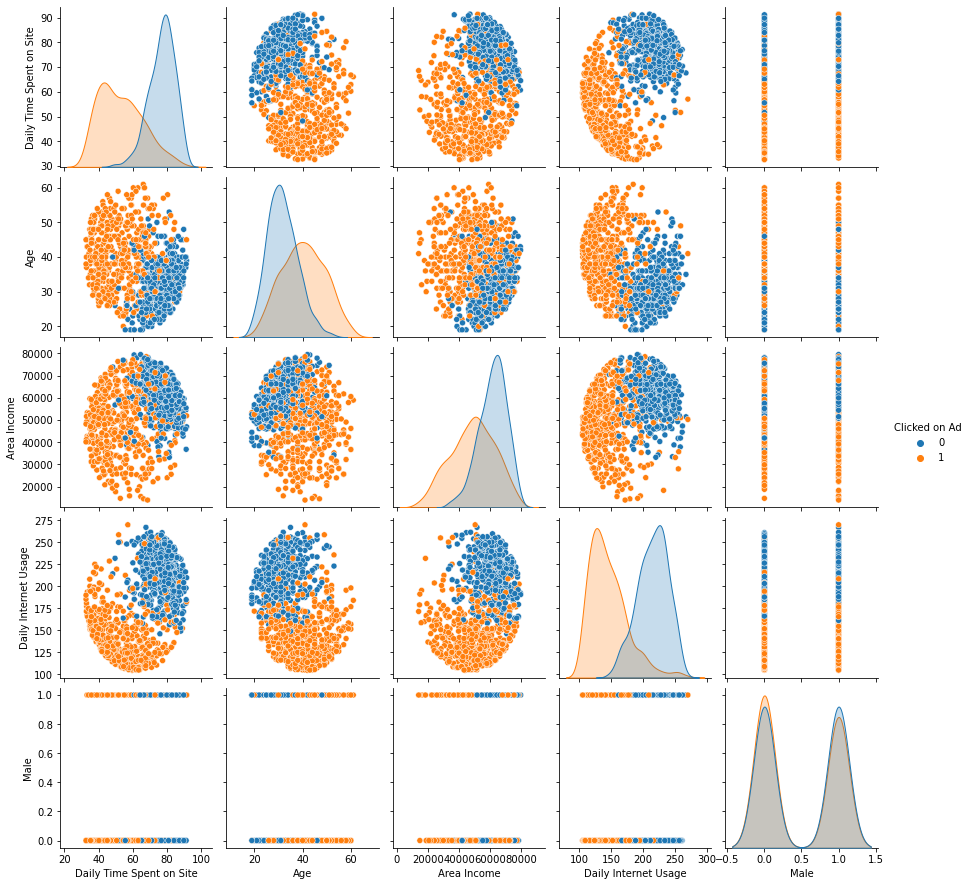

In [ ]:
sns.pairplot(data =df, hue='Clicked on Ad')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

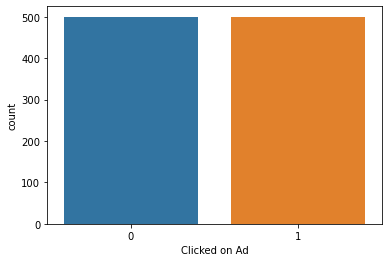

In [ ]:
sns.countplot(x='Clicked on Ad',data=df)

In [ ]:
df['Clicked on Ad'].sum()

500

In [ ]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


<AxesSubplot:>

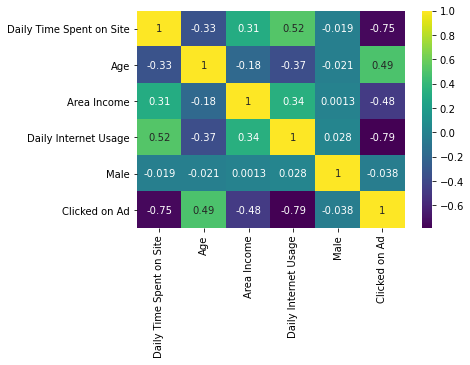

In [ ]:
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='Age', ylabel='Count'>

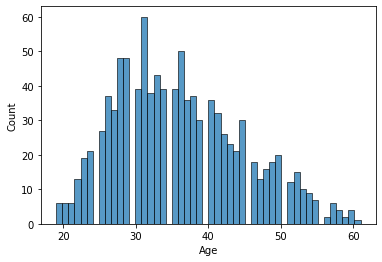

In [ ]:
sns.histplot(data=df,x='Age',bins=50)

In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad'],
      dtype='object')

# FEATURE ENGINEERING

In [ ]:
import datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df['Hour'] = df['Timestamp'].apply(lambda time: time.hour)
df['Month'] = df['Timestamp'].apply(lambda time: time.month)
df['Day of Week'] = df['Timestamp'].apply(lambda time: time.dayofweek)
df['Year'] = df['Timestamp'].apply(lambda time: time.year)
df['Minute'] = df['Timestamp'].apply(lambda time: time.minute)
df['Second'] = df['Timestamp'].apply(lambda time: time.second)

In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'Hour',
       'Month', 'Day of Week', 'Year', 'Minute', 'Second'],
      dtype='object')

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Hour,Month,Day of Week,Year,Minute,Second
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,3,6,2016,53,11
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,4,0,2016,39,2
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,20,3,6,2016,35,42
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,2,1,6,2016,31,19
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,3,6,4,2016,36,18


In [ ]:
df=df.drop(['Timestamp'],axis=1)

<AxesSubplot:>

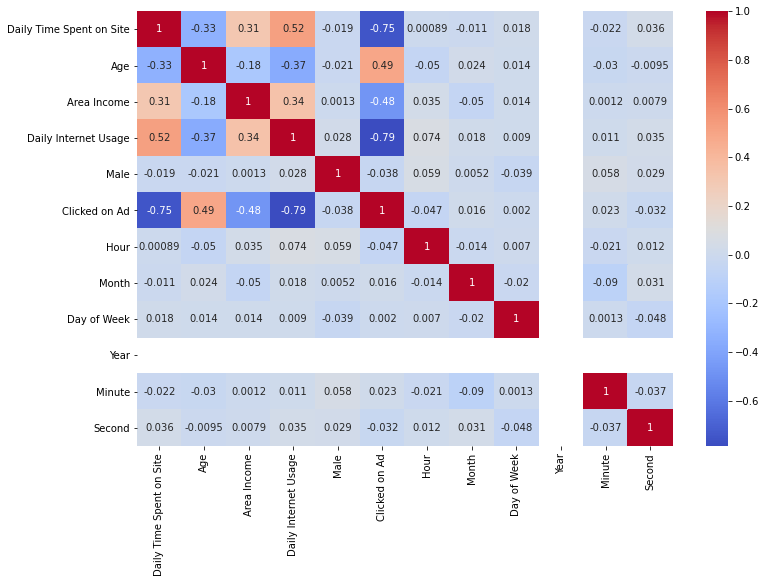

In [ ]:
plt.figure(figsize=(12,8))
g = df.corr()
sns.heatmap(data=g,annot =True , cmap='coolwarm')

# TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Clicked on Ad',axis=1), 
                                                    df['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,Month,Day of Week,Year,Minute,Second
290,50.52,31,72270.88,171.62,0,15,1,5,2016,2,13
167,86.06,31,53767.12,219.72,1,18,4,3,2016,34,56
486,83.97,40,66291.67,158.42,1,11,2,1,2016,49,18
683,76.83,28,67990.84,192.81,0,14,3,4,2016,33,38
876,67.39,44,51257.26,107.19,0,13,1,6,2016,41,38
...,...,...,...,...,...,...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0,17,1,5,2016,33,3
838,44.13,40,33601.84,128.48,1,20,3,3,2016,20,32
337,75.32,28,59998.50,233.60,1,21,1,4,2016,58,55
523,67.94,43,68447.17,128.16,0,0,5,6,2016,23,13


In [ ]:
y_train

290    1
167    0
486    0
683    0
876    1
      ..
575    1
838    1
337    0
523    1
863    0
Name: Clicked on Ad, Length: 700, dtype: int64

# SCALING OUR DATA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X_train

array([[0.30460649, 0.28571429, 0.89192071, ..., 0.        , 0.03389831,
        0.22033898],
       [0.90872004, 0.28571429, 0.60871072, ..., 0.        , 0.57627119,
        0.94915254],
       [0.87319395, 0.5       , 0.80040569, ..., 0.        , 0.83050847,
        0.30508475],
       ...,
       [0.72616012, 0.21428571, 0.70408534, ..., 0.        , 0.98305085,
        0.93220339],
       [0.60071392, 0.57142857, 0.83339677, ..., 0.        , 0.38983051,
        0.22033898],
       [0.74859765, 0.47619048, 0.79926757, ..., 0.        , 0.6440678 ,
        0.50847458]])

# 1) SGD OPTIMIZER

Epoch 1/250
11/11 [==============================] - 1s 26ms/step - loss: 0.6998 - val_loss: 0.6850
Epoch 2/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6905 - val_loss: 0.6828
Epoch 3/250
11/11 [==============================] - 0s 9ms/step - loss: 0.6906 - val_loss: 0.6802
Epoch 4/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6946 - val_loss: 0.6778
Epoch 5/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6882 - val_loss: 0.6751
Epoch 6/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6811 - val_loss: 0.6717
Epoch 7/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6793 - val_loss: 0.6689
Epoch 8/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6859 - val_loss: 0.6661
Epoch 9/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6739 - val_loss: 0.6632
Epoch 10/250
11/11 [==============================] - 0s 6ms/step - loss: 0.6752 - val_loss: 0.6597
Epoch 11

Epoch 83/250
11/11 [==============================] - 0s 8ms/step - loss: 0.4548 - val_loss: 0.3472
Epoch 84/250
11/11 [==============================] - 0s 26ms/step - loss: 0.4530 - val_loss: 0.3433
Epoch 85/250
11/11 [==============================] - 0s 14ms/step - loss: 0.4606 - val_loss: 0.3408
Epoch 86/250
11/11 [==============================] - 0s 13ms/step - loss: 0.4741 - val_loss: 0.3383
Epoch 87/250
11/11 [==============================] - 0s 17ms/step - loss: 0.4133 - val_loss: 0.3338
Epoch 88/250
11/11 [==============================] - 0s 16ms/step - loss: 0.4408 - val_loss: 0.3308
Epoch 89/250
11/11 [==============================] - 0s 17ms/step - loss: 0.4170 - val_loss: 0.3262
Epoch 90/250
11/11 [==============================] - 0s 13ms/step - loss: 0.4343 - val_loss: 0.3225
Epoch 91/250
11/11 [==============================] - 0s 12ms/step - loss: 0.4037 - val_loss: 0.3184
Epoch 92/250
11/11 [==============================] - 0s 10ms/step - loss: 0.4160 - val_loss

Epoch 164/250
11/11 [==============================] - 0s 13ms/step - loss: 0.3261 - val_loss: 0.1777
Epoch 165/250
11/11 [==============================] - 0s 16ms/step - loss: 0.3193 - val_loss: 0.1768
Epoch 166/250
11/11 [==============================] - 0s 20ms/step - loss: 0.3171 - val_loss: 0.1764
Epoch 167/250
11/11 [==============================] - 0s 15ms/step - loss: 0.2553 - val_loss: 0.1752
Epoch 168/250
11/11 [==============================] - 0s 13ms/step - loss: 0.2822 - val_loss: 0.1750
Epoch 169/250
11/11 [==============================] - 0s 13ms/step - loss: 0.2782 - val_loss: 0.1735
Epoch 170/250
11/11 [==============================] - 0s 12ms/step - loss: 0.3282 - val_loss: 0.1740
Epoch 171/250
11/11 [==============================] - 0s 14ms/step - loss: 0.2791 - val_loss: 0.1736
Epoch 172/250
11/11 [==============================] - 0s 12ms/step - loss: 0.2815 - val_loss: 0.1725
Epoch 173/250
11/11 [==============================] - 0s 13ms/step - loss: 0.3041

11/11 [==============================] - 0s 7ms/step - loss: 0.2700 - val_loss: 0.1371
Epoch 245/250
11/11 [==============================] - 0s 8ms/step - loss: 0.2393 - val_loss: 0.1369
Epoch 246/250
11/11 [==============================] - 0s 13ms/step - loss: 0.2628 - val_loss: 0.1366
Epoch 247/250
11/11 [==============================] - 0s 7ms/step - loss: 0.2654 - val_loss: 0.1372
Epoch 248/250
11/11 [==============================] - 0s 18ms/step - loss: 0.2528 - val_loss: 0.1363
Epoch 249/250
11/11 [==============================] - 0s 9ms/step - loss: 0.2393 - val_loss: 0.1361
Epoch 250/250
11/11 [==============================] - 0s 18ms/step - loss: 0.2743 - val_loss: 0.1352


C:\Users\Seema\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

           0       0.93      0.99      0.96       157
           1       0.98      0.92      0.95       143

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



[[155   2]
 [ 12 131]]


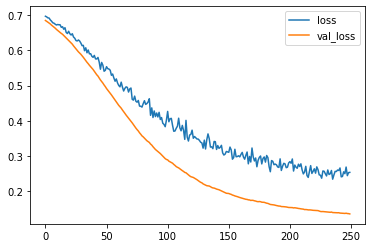

In [ ]:
model= Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD',loss='binary_crossentropy') 


model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          batch_size=64,
          validation_data=(X_test, y_test), 
          )

losses1 = pd.DataFrame(model.history.history)



losses1[['loss','val_loss']].plot()

pred = model.predict_classes(X_test)

print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

# 2) Adagrad OPTIMIZER

Epoch 1/250
11/11 [==============================] - 1s 53ms/step - loss: 0.7399 - val_loss: 0.7114
Epoch 2/250
11/11 [==============================] - 0s 18ms/step - loss: 0.7346 - val_loss: 0.7090
Epoch 3/250
11/11 [==============================] - 0s 13ms/step - loss: 0.7246 - val_loss: 0.7070
Epoch 4/250
11/11 [==============================] - 0s 11ms/step - loss: 0.7319 - val_loss: 0.7054
Epoch 5/250
11/11 [==============================] - 0s 9ms/step - loss: 0.7264 - val_loss: 0.7038
Epoch 6/250
11/11 [==============================] - 0s 20ms/step - loss: 0.7129 - val_loss: 0.7025
Epoch 7/250
11/11 [==============================] - 0s 19ms/step - loss: 0.7230 - val_loss: 0.7014
Epoch 8/250
11/11 [==============================] - 0s 12ms/step - loss: 0.7252 - val_loss: 0.7003
Epoch 9/250
11/11 [==============================] - 0s 15ms/step - loss: 0.7152 - val_loss: 0.6992
Epoch 10/250
11/11 [==============================] - 0s 10ms/step - loss: 0.7133 - val_loss: 0.6982


11/11 [==============================] - 0s 6ms/step - loss: 0.7051 - val_loss: 0.6790
Epoch 83/250
11/11 [==============================] - 0s 9ms/step - loss: 0.6907 - val_loss: 0.6789
Epoch 84/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7030 - val_loss: 0.6788
Epoch 85/250
11/11 [==============================] - 0s 6ms/step - loss: 0.6904 - val_loss: 0.6787
Epoch 86/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6875 - val_loss: 0.6786
Epoch 87/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6979 - val_loss: 0.6785
Epoch 88/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6890 - val_loss: 0.6784
Epoch 89/250
11/11 [==============================] - 0s 11ms/step - loss: 0.6929 - val_loss: 0.6783
Epoch 90/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6936 - val_loss: 0.6782
Epoch 91/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6924 - val_loss: 0.6781
Epoch 92/250

11/11 [==============================] - 0s 13ms/step - loss: 0.6828 - val_loss: 0.6722
Epoch 164/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6927 - val_loss: 0.6722
Epoch 165/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6873 - val_loss: 0.6721
Epoch 166/250
11/11 [==============================] - 0s 12ms/step - loss: 0.6869 - val_loss: 0.6720
Epoch 167/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6868 - val_loss: 0.6719
Epoch 168/250
11/11 [==============================] - 0s 15ms/step - loss: 0.6892 - val_loss: 0.6719
Epoch 169/250
11/11 [==============================] - 0s 9ms/step - loss: 0.6853 - val_loss: 0.6718
Epoch 170/250
11/11 [==============================] - 0s 13ms/step - loss: 0.6880 - val_loss: 0.6717
Epoch 171/250
11/11 [==============================] - 0s 9ms/step - loss: 0.6907 - val_loss: 0.6716
Epoch 172/250
11/11 [==============================] - 0s 13ms/step - loss: 0.6916 - val_loss: 0.6715

11/11 [==============================] - 0s 10ms/step - loss: 0.6759 - val_loss: 0.6662
Epoch 245/250
11/11 [==============================] - 0s 6ms/step - loss: 0.6824 - val_loss: 0.6661
Epoch 246/250
11/11 [==============================] - 0s 6ms/step - loss: 0.6886 - val_loss: 0.6661
Epoch 247/250
11/11 [==============================] - 0s 10ms/step - loss: 0.6764 - val_loss: 0.6660
Epoch 248/250
11/11 [==============================] - 0s 6ms/step - loss: 0.6794 - val_loss: 0.6659
Epoch 249/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6774 - val_loss: 0.6658
Epoch 250/250
11/11 [==============================] - 0s 15ms/step - loss: 0.6879 - val_loss: 0.6657


C:\Users\Seema\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

           0       0.60      0.96      0.74       157
           1       0.87      0.29      0.43       143

    accuracy                           0.64       300
   macro avg       0.73      0.62      0.58       300
weighted avg       0.73      0.64      0.59       300



[[151   6]
 [102  41]]


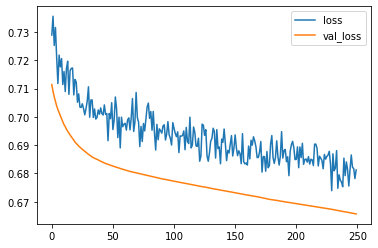

In [ ]:
model= Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adagrad',loss='binary_crossentropy') 


model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          batch_size=64,
          validation_data=(X_test, y_test), 
          )

losses2 = pd.DataFrame(model.history.history)



losses2[['loss','val_loss']].plot()

pred = model.predict_classes(X_test)

print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))


# 3) RMSProp OPTIMIZER

Epoch 1/250
11/11 [==============================] - 2s 27ms/step - loss: 0.9060 - val_loss: 0.8376
Epoch 2/250
11/11 [==============================] - 0s 11ms/step - loss: 0.8405 - val_loss: 0.7964
Epoch 3/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7990 - val_loss: 0.7658
Epoch 4/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7441 - val_loss: 0.7429
Epoch 5/250
11/11 [==============================] - 0s 10ms/step - loss: 0.7387 - val_loss: 0.7229
Epoch 6/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7232 - val_loss: 0.7049
Epoch 7/250
11/11 [==============================] - 0s 6ms/step - loss: 0.6896 - val_loss: 0.6899
Epoch 8/250
11/11 [==============================] - 0s 10ms/step - loss: 0.6835 - val_loss: 0.6774
Epoch 9/250
11/11 [==============================] - 0s 6ms/step - loss: 0.6639 - val_loss: 0.6656
Epoch 10/250
11/11 [==============================] - 0s 6ms/step - loss: 0.6530 - val_loss: 0.6546
Epoch

Epoch 83/250
11/11 [==============================] - 0s 9ms/step - loss: 0.1965 - val_loss: 0.1351
Epoch 84/250
11/11 [==============================] - 0s 11ms/step - loss: 0.2334 - val_loss: 0.1348
Epoch 85/250
11/11 [==============================] - 0s 8ms/step - loss: 0.2029 - val_loss: 0.1347
Epoch 86/250
11/11 [==============================] - 0s 6ms/step - loss: 0.1596 - val_loss: 0.1330
Epoch 87/250
11/11 [==============================] - 0s 11ms/step - loss: 0.1849 - val_loss: 0.1344
Epoch 88/250
11/11 [==============================] - 0s 6ms/step - loss: 0.1567 - val_loss: 0.1331
Epoch 89/250
11/11 [==============================] - 0s 6ms/step - loss: 0.1462 - val_loss: 0.1316
Epoch 90/250
11/11 [==============================] - 0s 10ms/step - loss: 0.1807 - val_loss: 0.1310
Epoch 91/250
11/11 [==============================] - 0s 6ms/step - loss: 0.1887 - val_loss: 0.1305
Epoch 92/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1787 - val_loss: 0.12

Epoch 164/250
11/11 [==============================] - 0s 10ms/step - loss: 0.1483 - val_loss: 0.1160
Epoch 165/250
11/11 [==============================] - 0s 12ms/step - loss: 0.1319 - val_loss: 0.1162
Epoch 166/250
11/11 [==============================] - 0s 8ms/step - loss: 0.1591 - val_loss: 0.1156
Epoch 167/250
11/11 [==============================] - 0s 9ms/step - loss: 0.1040 - val_loss: 0.1150
Epoch 168/250
11/11 [==============================] - 0s 10ms/step - loss: 0.1328 - val_loss: 0.1156
Epoch 169/250
11/11 [==============================] - 0s 9ms/step - loss: 0.1457 - val_loss: 0.1148
Epoch 170/250
11/11 [==============================] - 0s 15ms/step - loss: 0.1277 - val_loss: 0.1145
Epoch 171/250
11/11 [==============================] - 0s 11ms/step - loss: 0.1148 - val_loss: 0.1126
Epoch 172/250
11/11 [==============================] - 0s 9ms/step - loss: 0.1164 - val_loss: 0.1111
Epoch 173/250
11/11 [==============================] - 0s 12ms/step - loss: 0.1250 - v

11/11 [==============================] - 0s 9ms/step - loss: 0.1016 - val_loss: 0.1075
Epoch 245/250
11/11 [==============================] - 0s 9ms/step - loss: 0.1013 - val_loss: 0.1073
Epoch 246/250
11/11 [==============================] - 0s 26ms/step - loss: 0.1047 - val_loss: 0.1069
Epoch 247/250
11/11 [==============================] - 0s 13ms/step - loss: 0.0996 - val_loss: 0.1089
Epoch 248/250
11/11 [==============================] - 0s 14ms/step - loss: 0.0956 - val_loss: 0.1074
Epoch 249/250
11/11 [==============================] - 0s 18ms/step - loss: 0.0971 - val_loss: 0.1073
Epoch 250/250
11/11 [==============================] - 0s 12ms/step - loss: 0.0940 - val_loss: 0.1076


C:\Users\Seema\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

           0       0.95      0.99      0.97       157
           1       0.99      0.94      0.96       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



[[155   2]
 [  8 135]]


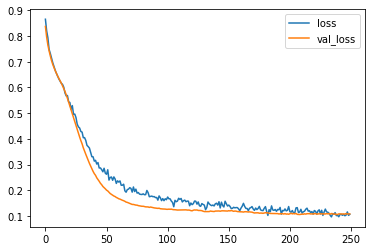

In [ ]:
model= Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSProp',loss='binary_crossentropy') 


model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          batch_size=64,
          validation_data=(X_test, y_test), 
          )

losses3 = pd.DataFrame(model.history.history)


losses3[['loss','val_loss']].plot()

pred = model.predict_classes(X_test)

print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

# 4) Adam OPTIMIZER

Epoch 1/250
11/11 [==============================] - 2s 32ms/step - loss: 0.6900 - val_loss: 0.6803
Epoch 2/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6789 - val_loss: 0.6663
Epoch 3/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6777 - val_loss: 0.6532
Epoch 4/250
11/11 [==============================] - 0s 14ms/step - loss: 0.6533 - val_loss: 0.6418
Epoch 5/250
11/11 [==============================] - 0s 10ms/step - loss: 0.6468 - val_loss: 0.6305
Epoch 6/250
11/11 [==============================] - 0s 11ms/step - loss: 0.6384 - val_loss: 0.6196
Epoch 7/250
11/11 [==============================] - 0s 7ms/step - loss: 0.6245 - val_loss: 0.6084
Epoch 8/250
11/11 [==============================] - 0s 8ms/step - loss: 0.6277 - val_loss: 0.5976
Epoch 9/250
11/11 [==============================] - 0s 10ms/step - loss: 0.6112 - val_loss: 0.5860
Epoch 10/250
11/11 [==============================] - 0s 9ms/step - loss: 0.6006 - val_loss: 0.5728
Epoc

11/11 [==============================] - 0s 7ms/step - loss: 0.1667 - val_loss: 0.1234
Epoch 83/250
11/11 [==============================] - 0s 8ms/step - loss: 0.1809 - val_loss: 0.1224
Epoch 84/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1843 - val_loss: 0.1218
Epoch 85/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1905 - val_loss: 0.1208
Epoch 86/250
11/11 [==============================] - 0s 8ms/step - loss: 0.1599 - val_loss: 0.1210
Epoch 87/250
11/11 [==============================] - 0s 9ms/step - loss: 0.2020 - val_loss: 0.1213
Epoch 88/250
11/11 [==============================] - 0s 29ms/step - loss: 0.1308 - val_loss: 0.1194
Epoch 89/250
11/11 [==============================] - 0s 12ms/step - loss: 0.1419 - val_loss: 0.1186
Epoch 90/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1650 - val_loss: 0.1189
Epoch 91/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1619 - val_loss: 0.1184
Epoch 92/25

11/11 [==============================] - 0s 8ms/step - loss: 0.1190 - val_loss: 0.1073
Epoch 164/250
11/11 [==============================] - 0s 8ms/step - loss: 0.1443 - val_loss: 0.1073
Epoch 165/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1233 - val_loss: 0.1071
Epoch 166/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1080 - val_loss: 0.1084
Epoch 167/250
11/11 [==============================] - 0s 7ms/step - loss: 0.0838 - val_loss: 0.1079
Epoch 168/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1059 - val_loss: 0.1075
Epoch 169/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1226 - val_loss: 0.1071
Epoch 170/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1303 - val_loss: 0.1077
Epoch 171/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1238 - val_loss: 0.1068
Epoch 172/250
11/11 [==============================] - 0s 8ms/step - loss: 0.1218 - val_loss: 0.1060
Epoc

11/11 [==============================] - 0s 7ms/step - loss: 0.1007 - val_loss: 0.1041
Epoch 245/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1030 - val_loss: 0.1060
Epoch 246/250
11/11 [==============================] - 0s 6ms/step - loss: 0.1106 - val_loss: 0.1058
Epoch 247/250
11/11 [==============================] - 0s 7ms/step - loss: 0.0957 - val_loss: 0.1051
Epoch 248/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1005 - val_loss: 0.1062
Epoch 249/250
11/11 [==============================] - 0s 7ms/step - loss: 0.1209 - val_loss: 0.1063
Epoch 250/250
11/11 [==============================] - 0s 7ms/step - loss: 0.0923 - val_loss: 0.1057
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       157
           1       0.99      0.93      0.96       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96  

C:\Users\Seema\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



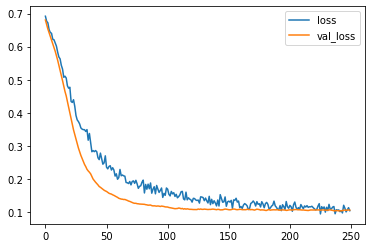

In [ ]:
model= Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy') 


model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          batch_size=64,
          validation_data=(X_test, y_test), 
          )

losses4 = pd.DataFrame(model.history.history)


losses4[['loss','val_loss']].plot()

pred = model.predict_classes(X_test)

print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

# 5) Adadelta OPTIMIZER

Epoch 1/250
11/11 [==============================] - 1s 25ms/step - loss: 0.8083 - val_loss: 0.7792
Epoch 2/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7918 - val_loss: 0.7792
Epoch 3/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7996 - val_loss: 0.7791
Epoch 4/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7876 - val_loss: 0.7791
Epoch 5/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7872 - val_loss: 0.7791
Epoch 6/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7889 - val_loss: 0.7790
Epoch 7/250
11/11 [==============================] - 0s 8ms/step - loss: 0.7947 - val_loss: 0.7790
Epoch 8/250
11/11 [==============================] - 0s 7ms/step - loss: 0.8014 - val_loss: 0.7790
Epoch 9/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7996 - val_loss: 0.7789
Epoch 10/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7955 - val_loss: 0.7789
Epoch 11

Epoch 83/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7910 - val_loss: 0.7757
Epoch 84/250
11/11 [==============================] - 0s 7ms/step - loss: 0.8095 - val_loss: 0.7757
Epoch 85/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7689 - val_loss: 0.7756
Epoch 86/250
11/11 [==============================] - 0s 7ms/step - loss: 0.8038 - val_loss: 0.7756
Epoch 87/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7869 - val_loss: 0.7755
Epoch 88/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7793 - val_loss: 0.7755
Epoch 89/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7800 - val_loss: 0.7754
Epoch 90/250
11/11 [==============================] - 0s 7ms/step - loss: 0.8027 - val_loss: 0.7754
Epoch 91/250
11/11 [==============================] - 0s 7ms/step - loss: 0.8047 - val_loss: 0.7753
Epoch 92/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7657 - val_loss: 0.7753


11/11 [==============================] - 0s 7ms/step - loss: 0.7775 - val_loss: 0.7718
Epoch 165/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7632 - val_loss: 0.7717
Epoch 166/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7952 - val_loss: 0.7717
Epoch 167/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7898 - val_loss: 0.7716
Epoch 168/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7533 - val_loss: 0.7716
Epoch 169/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7792 - val_loss: 0.7715
Epoch 170/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7812 - val_loss: 0.7715
Epoch 171/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7912 - val_loss: 0.7714
Epoch 172/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7898 - val_loss: 0.7713
Epoch 173/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7861 - val_loss: 0.7713
Epoc

11/11 [==============================] - 0s 8ms/step - loss: 0.7944 - val_loss: 0.7676
Epoch 246/250
11/11 [==============================] - 0s 6ms/step - loss: 0.7654 - val_loss: 0.7675
Epoch 247/250
11/11 [==============================] - 0s 8ms/step - loss: 0.7682 - val_loss: 0.7675
Epoch 248/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7938 - val_loss: 0.7674
Epoch 249/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7959 - val_loss: 0.7674
Epoch 250/250
11/11 [==============================] - 0s 7ms/step - loss: 0.7754 - val_loss: 0.7673
              precision    recall  f1-score   support

           0       0.04      0.01      0.01       157
           1       0.43      0.83      0.57       143

    accuracy                           0.40       300
   macro avg       0.24      0.42      0.29       300
weighted avg       0.23      0.40      0.28       300



[[  1 156]
 [ 24 119]]


C:\Users\Seema\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



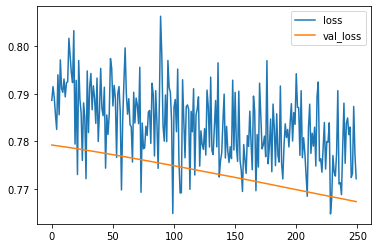

In [ ]:
model= Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adadelta',loss='binary_crossentropy') 


model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          batch_size=64,
          validation_data=(X_test, y_test), 
          )

losses5 = pd.DataFrame(model.history.history)

losses5[['loss','val_loss']].plot()

pred = model.predict_classes(X_test)

print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

In [ ]:
lossSGD = losses1['loss'] 
lossAdagrad = losses2['loss']
lossRMSProp = losses3['loss']
lossAdam = losses4['loss']
lossAdadelta = losses5['loss']

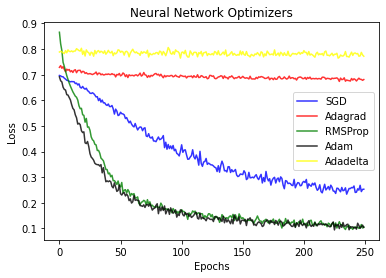

In [ ]:
plt.figure()
plt.plot(lossSGD, color='blue', alpha=0.8, label='SGD')
plt.plot(lossAdagrad, color='red', alpha=0.8, label='Adagrad')
plt.plot(lossRMSProp, color='green', alpha=0.8, label='RMSProp')
plt.plot(lossAdam, color='black', alpha=0.8, label='Adam')
plt.plot(lossAdadelta, color='yellow', alpha=0.8, label='Adadelta')
plt.title("Neural Network Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
## So we can see RMSProp and Adam Optimizers gave best performance

## THANK YOU 